# Network Analysis project: Crime dataset

In [5]:
import networkx as nx
import pandas as pd

In [6]:
data_path = '..\Data\out.moreno_crime_crime'

In [30]:
data_df = pd.read_csv(data_path, sep=' ', names=["person", "crime"], index_col=False, dtype={'person':str, 'crime':str})
data_df["person"] = 'p' + data_df['person'] 
data_df['crime'] = 'c' + data_df['crime']
data_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [44]:
G = nx.read_edgelist(data_df)

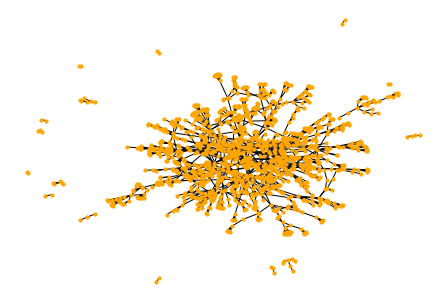

In [87]:
graph = nx.Graph()
graph.add_nodes_from(data_df['person'], bipartite=0)
graph.add_nodes_from(data_df['crime'], bipartite=1)
graph.add_edges_from(
    [(row['person'], row['crime']) for idx, row in data_df.iterrows()])

nx.draw(graph, node_size=10, node_color='orange')

In [36]:
nx.is_connected(graph)

False

In [38]:
# components in the graph sorted in descendent order
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
# selecting the biggest component
G0 = graph.subgraph(Gcc[0])

In [94]:
comp_list = []
for comp in Gcc:
    comp_len = len(comp)
    comp_list.append(comp_len)

f'Number of nodes for each components {comp_list} and number of components {len(comp_list)}'

'Number of nodes for each components [1263, 30, 18, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] and number of components 20'

In [ ]:
top = nx.bipartite.sets(G0)[0]
pos = nx.bipartite_layout(G0, top)

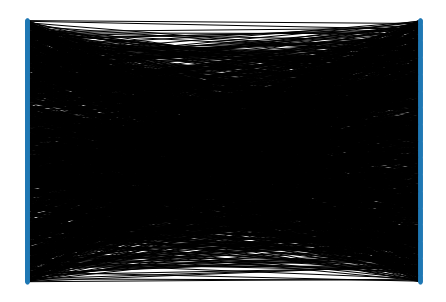

In [88]:
biggest_comp_graph = nx.draw(G0,pos,node_size=10)

In [52]:
# number of nodes in the all graph
num_person = len(set(data_df["person"]))
num_crime = len(set(data_df['crime']))
f'Number of person:{num_person} and number of crimes: {num_crime}'


'Number of person:829 and number of crimes: 551'

In [55]:
# number of nodes in the biggest componnet
num_G0 = nx.bipartite.sets(G0)
num_p_list = [num_p for num_p in num_G0 if 'p' in num_p] 
num_p_list

[]

In [66]:
len(num_G0[0])


754

In [ ]:
# betweeness centrality
cent = nx.betweenness_centrality